## Observations and Insights 

In [1]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
#from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#print(mouse_metadata.columns)
#print(study_results.columns)

merge_df=pd.merge(study_results,mouse_metadata, on='Mouse ID')

# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(merge_df['Mouse ID'].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.groupby(['Mouse ID', 'Timepoint']).count().sort_values(by=('Metastatic Sites'), ascending=False).head()


Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
g989     20                          2                 2             2    2   
         15                          2                 2             2    2   
         10                          2                 2             2    2   
         5                           2                 2             2    2   
         0                           2                 2             2    2   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     20                  2           2  
         15                  2           2  
         10                  2           2  
         5                   2           2  
         0                   2           2

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
print(f"{len(merge_df.loc[merge_df['Mouse ID']=='g989'])} rows to delete")
merge_df.loc[merge_df['Mouse ID']=='g989'].head()

13 rows to delete


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Alternative method: clean_df=study_results.drop(study_results[study_results['Mouse ID']=='g989'].index)

clean_df=merge_df.loc[merge_df['Mouse ID']!='g989']
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_df=clean_df.groupby("Drug Regimen")
tumor_vol= drug_df['Tumor Volume (mm3)']

drug_stats=pd.DataFrame({
     "Mean": tumor_vol.mean(),
     "Median":tumor_vol.median(),
     "Variance": tumor_vol.var() ,
     "Std Deviation": tumor_vol.std(),
     "SEM": tumor_vol.sem()
})
drug_stats

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drugagg_df=clean_df.groupby(["Drug Regimen"]).agg({
     "Tumor Volume (mm3)": ['mean','median','var','std','sem']
})
drugagg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
#Define variables for bar charts to come
drug_count_df=pd.DataFrame({
     "Count": tumor_vol.count()}).sort_values(by=('Count'), ascending=False)
drugs=drug_count_df.index

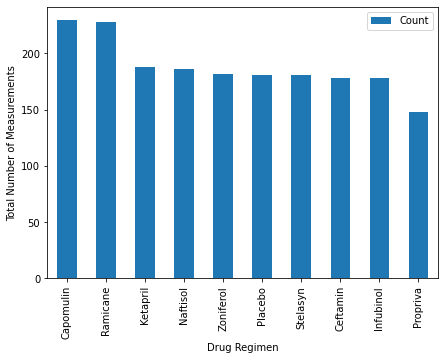

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

bar_pd=drug_count_df.plot(kind="bar",figsize=(7,5))
bar_pd.set_xticklabels(drugs,rotation = 90)
bar_pd.set_ylabel("Total Number of Measurements")
#plt.ylabel("Total Number of Measurements")
plt.show()


<BarContainer object of 10 artists>


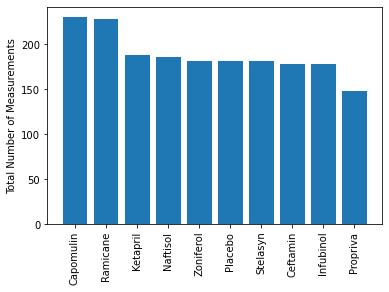

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

x_axis=np.arange(len(drugs))

measurements = drug_count_df['Count']

barplt=plt.bar(x_axis,measurements)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation='vertical')
plt.ylabel("Total Number of Measurements")
print(barplt)


In [12]:
#Define variables for Pie charts
gender_group=clean_df[['Mouse ID','Sex']].groupby(['Sex']).count()
gender_group=gender_group.rename(columns={'Mouse ID':'Count'})
sex=gender_group.index

gender_group

,Count
Sex,
Female,922
Male,958


Text(0, 0.5, 'Sex')

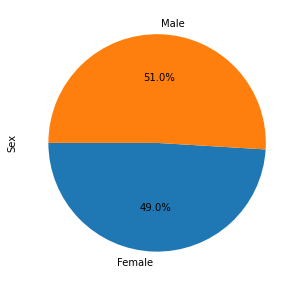

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_pd=gender_group['Count'].plot(kind="pie",autopct='%1.1f%%', figsize=(7,5),  startangle=180)
pie_pd.set_ylabel("Sex")                   
#pie_pd.set_xticklabels(sex)

Text(0, 0.5, 'Sex')

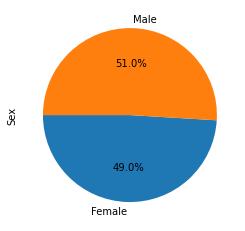

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_group['Count'],labels=sex, autopct='%1.1f%%', startangle=180)
plt.ylabel("Sex") 


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
timemax_df = clean_df.groupby("Mouse ID").agg({
     "Timepoint": ['max'],
    # "Tumor Volume (mm3)":[]
})
timemax_df.columns=timemax_df.columns.droplevel(0)
timemax_df=timemax_df.rename(columns={'max':'Timepoint'})
timemax_df

final_tumor_df = pd.merge(timemax_df,clean_df, how= 'left', on=['Timepoint',"Mouse ID"])
final_tumor_df=final_tumor_df.rename(columns={'Tumor Volume (mm3)':'Final Volume (mm3)'})
final_tumor_df


#final_tumor_df=clean_df[['Mouse ID', 'Timepoint','Drug Regimen','Tumor Volume (mm3)']].groupby(['Mouse ID','Drug Regimen']).max()
#final_tumor_df
#final_tumor_df['Timepoint'].max()


,Timepoint,Mouse ID,Final Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,a203,67.973419,2,Infubinol,Female,20,23
1,45,a251,65.525743,1,Infubinol,Female,21,25
2,45,a262,70.717621,4,Placebo,Female,17,29
3,45,a275,62.999356,3,Ceftamin,Female,20,28
4,30,a366,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,10,z435,48.710661,0,Propriva,Female,12,26
244,45,z578,30.638696,0,Ramicane,Male,11,16
245,45,z581,62.754451,3,Infubinol,Female,24,25
246,45,z795,65.741070,3,Naftisol,Female,13,29


In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergefinal_df=pd.merge(clean_df,final_tumor_df[['Final Volume (mm3)','Mouse ID']],on=['Mouse ID'])
#mergefinal_df=mergefinal_df.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume (mm3)','Tumor Volume (mm3)_y':'Final Volume (mm3)'})                                        
mergefinal_df

# Capomulin, Ramicane, Infubinol, and Ceftamin
topdrugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

topdrugs_df=final_tumor_df.loc[final_tumor_df['Drug Regimen'].isin(topdrugs)]
topdrugs_df

,Timepoint,Mouse ID,Final Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,45,a203,67.973419,2,Infubinol,Female,20,23
1,45,a251,65.525743,1,Infubinol,Female,21,25
3,45,a275,62.999356,3,Ceftamin,Female,20,28
6,45,a411,38.407618,1,Ramicane,Male,3,22
7,45,a444,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,45,y769,68.594745,4,Ceftamin,Female,6,27
239,45,y793,31.896238,2,Capomulin,Male,17,17
240,45,y865,64.729837,3,Ceftamin,Male,23,26
244,45,z578,30.638696,0,Ramicane,Male,11,16


In [17]:
# Put treatments into a list for for loop (and later for plot labels) - above
topdrugs

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]



In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drugs in topdrugs:
    treatment_df= topdrugs_df.loc[(topdrugs_df['Drug Regimen']== drugs)]
    final_vol=treatment_df['Final Volume (mm3)']
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
 
    #print(f"{drugs} Values below {lower_bound} could be outliers.")
#     print(f"{drugs} Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers= treatment_df['Final Volume (mm3)'].loc[(final_vol < lower_bound) | (final_vol > upper_bound)]

    #print(outliers)
    print(f"{drugs}'s potential outliers: {outliers}")
    
    #break


Capomulin's potential outliers: Series([], Name: Final Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Final Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Final Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Final Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Volume (mm3)')

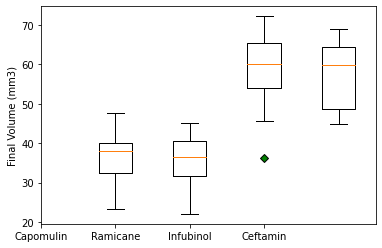

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
topdrugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Infubinol= topdrugs_df['Final Volume (mm3)'].loc[(topdrugs_df['Drug Regimen']=='Infubinol')]
Infubinol
Capomulin= topdrugs_df['Final Volume (mm3)'].loc[(topdrugs_df['Drug Regimen']=='Capomulin')]
Capomulin
Ramicane= topdrugs_df['Final Volume (mm3)'].loc[(topdrugs_df['Drug Regimen']=='Ramicane')]
Ramicane
Ceftamin= topdrugs_df['Final Volume (mm3)'].loc[(topdrugs_df['Drug Regimen']=='Ceftamin')]
Ceftamin
drug_points=[Capomulin,Ramicane,Infubinol,Ceftamin]
fig1, ax1 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(drug_points, flierprops=green_diamond)
x_axis=np.arange(len(topdrugs))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,topdrugs)
plt.ylabel("Final Volume (mm3)")

## Line and Scatter Plots

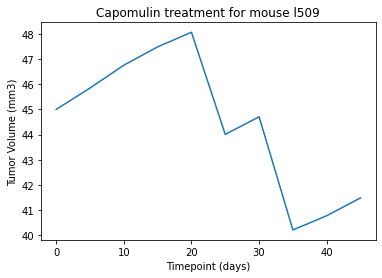

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_df=clean_df.loc[clean_df['Mouse ID']=='l509']
#[['Mouse ID','Timepoint']]
#l509_df=l509_df.set_index(['Mouse ID'])
graph=plt.plot(l509_df['Timepoint'],l509_df['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment for mouse l509")
plt.show()

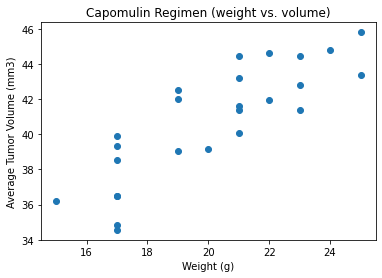

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df=clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
capogav_df=capo_df.groupby(['Mouse ID']).mean()
capogav_df.head()

av_weight=capogav_df['Weight (g)']
tum_vol=capogav_df['Tumor Volume (mm3)']

scat=plt.scatter(av_weight,tum_vol)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Capomulin Regimen (weight vs. volume)")
plt.show()

## Correlation and Regression

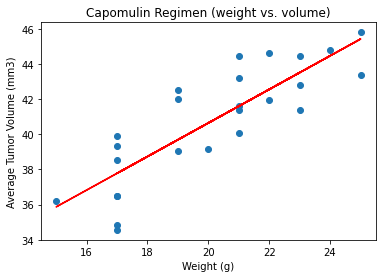

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(av_weight,tum_vol)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Capomulin Regimen (weight vs. volume)")
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(av_weight,tum_vol)
regress_values = av_weight * slope + intercept
plt.plot(av_weight,regress_values,"r-")

In [24]:
# Calculate the correlation coefficien
correlation = sts.pearsonr(av_weight,tum_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84
